In [11]:
## Notebook to verify that QFT-1QFT|x> = |x>

import numpy as np
from qiskit import *
from qiskit_aer import *
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
def QFTINVQFT(numQB, init = [], shots = 2000):
    qc = QuantumCircuit(numQB,numQB)
    for bit in init:
        qc.x(bit)
    qft = QFT(num_qubits=numQB, approximation_degree=0).to_gate()
    invqft = QFT(num_qubits=numQB, approximation_degree=0, inverse=True).to_gate()
    qc.append(qft, qargs=range(0,numQB))
    qc.append(invqft, qargs=range(0,numQB))
    qc.measure_all()
    simulator = Aer.get_backend("qasm_simulator")
    transpiler = transpile(qc, backend=simulator)
    result = simulator.run(transpiler, shots=shots).result()
    counts = result.get_counts()
    for key in counts.keys():
        counts[key] = counts[key]/shots
    return counts, qc

In [71]:
counts1, qc1 = QFTINVQFT(8, [2,3], 10000)
print(counts1)
qc1.draw("mpl")

KeyboardInterrupt: 

In [ ]:
plot_histogram(counts1)

{'00000000000000000000000000000 00000000000000000000000000000': 1.0}


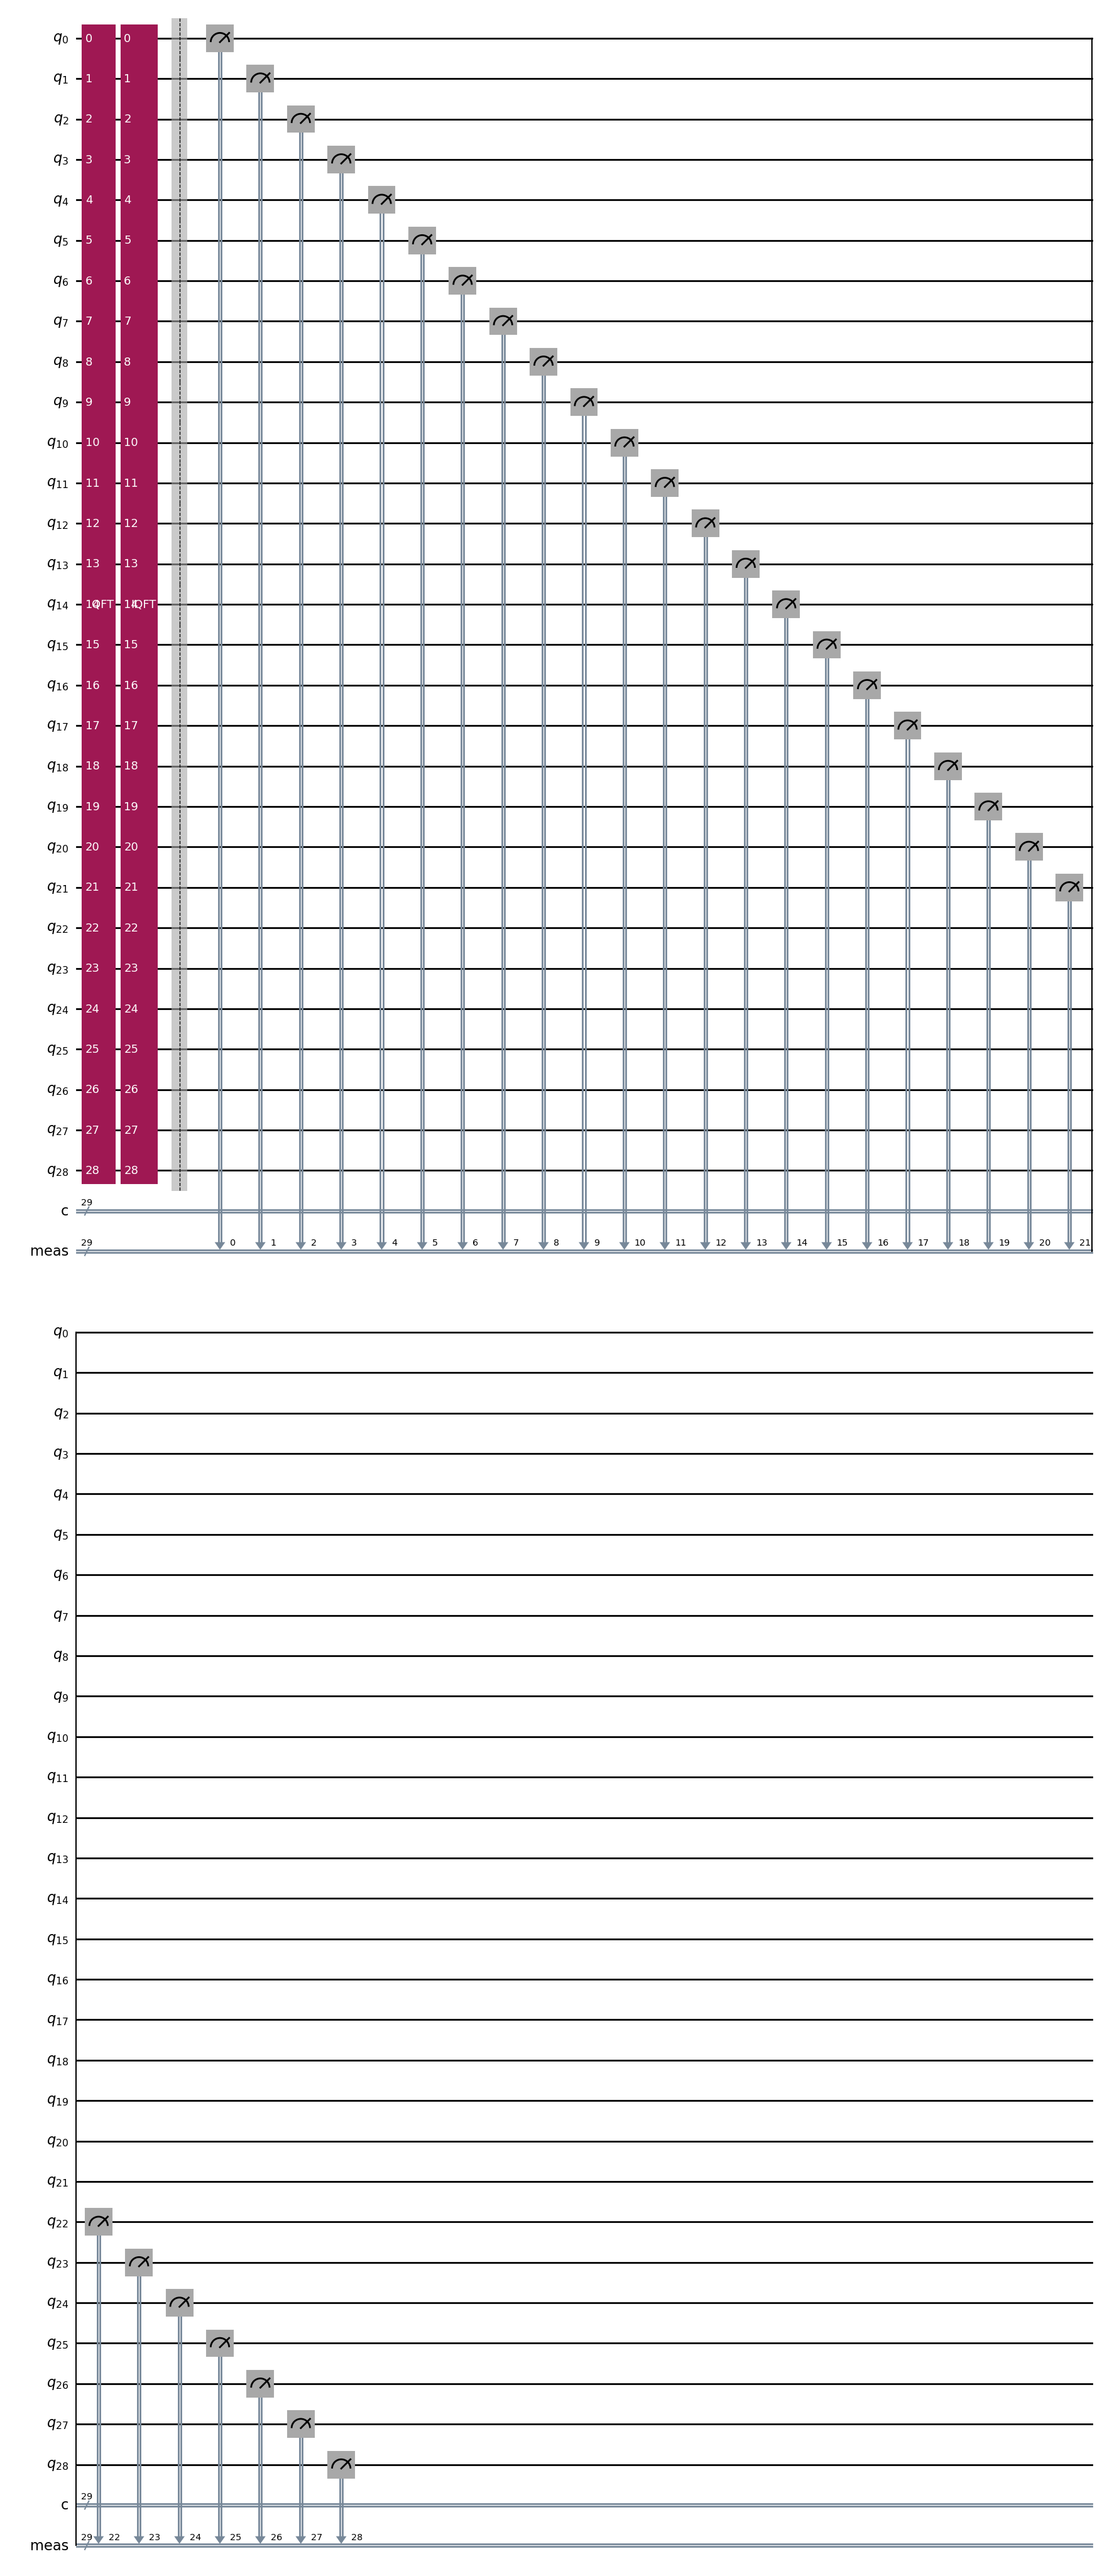

In [72]:
counts2, qc2 = QFTINVQFT(29, shots = 5000)
print(counts2)
qc2.draw("mpl")

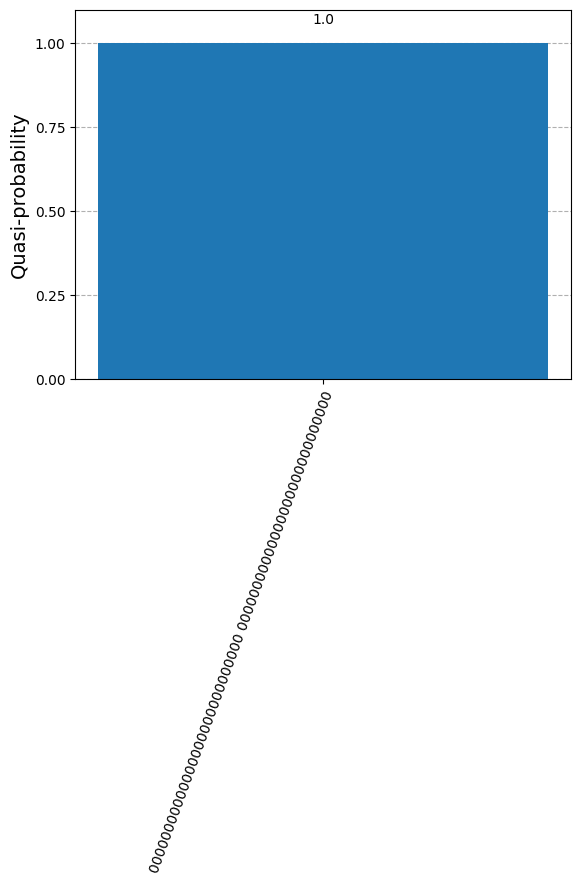

In [73]:
 plot_histogram(counts2)

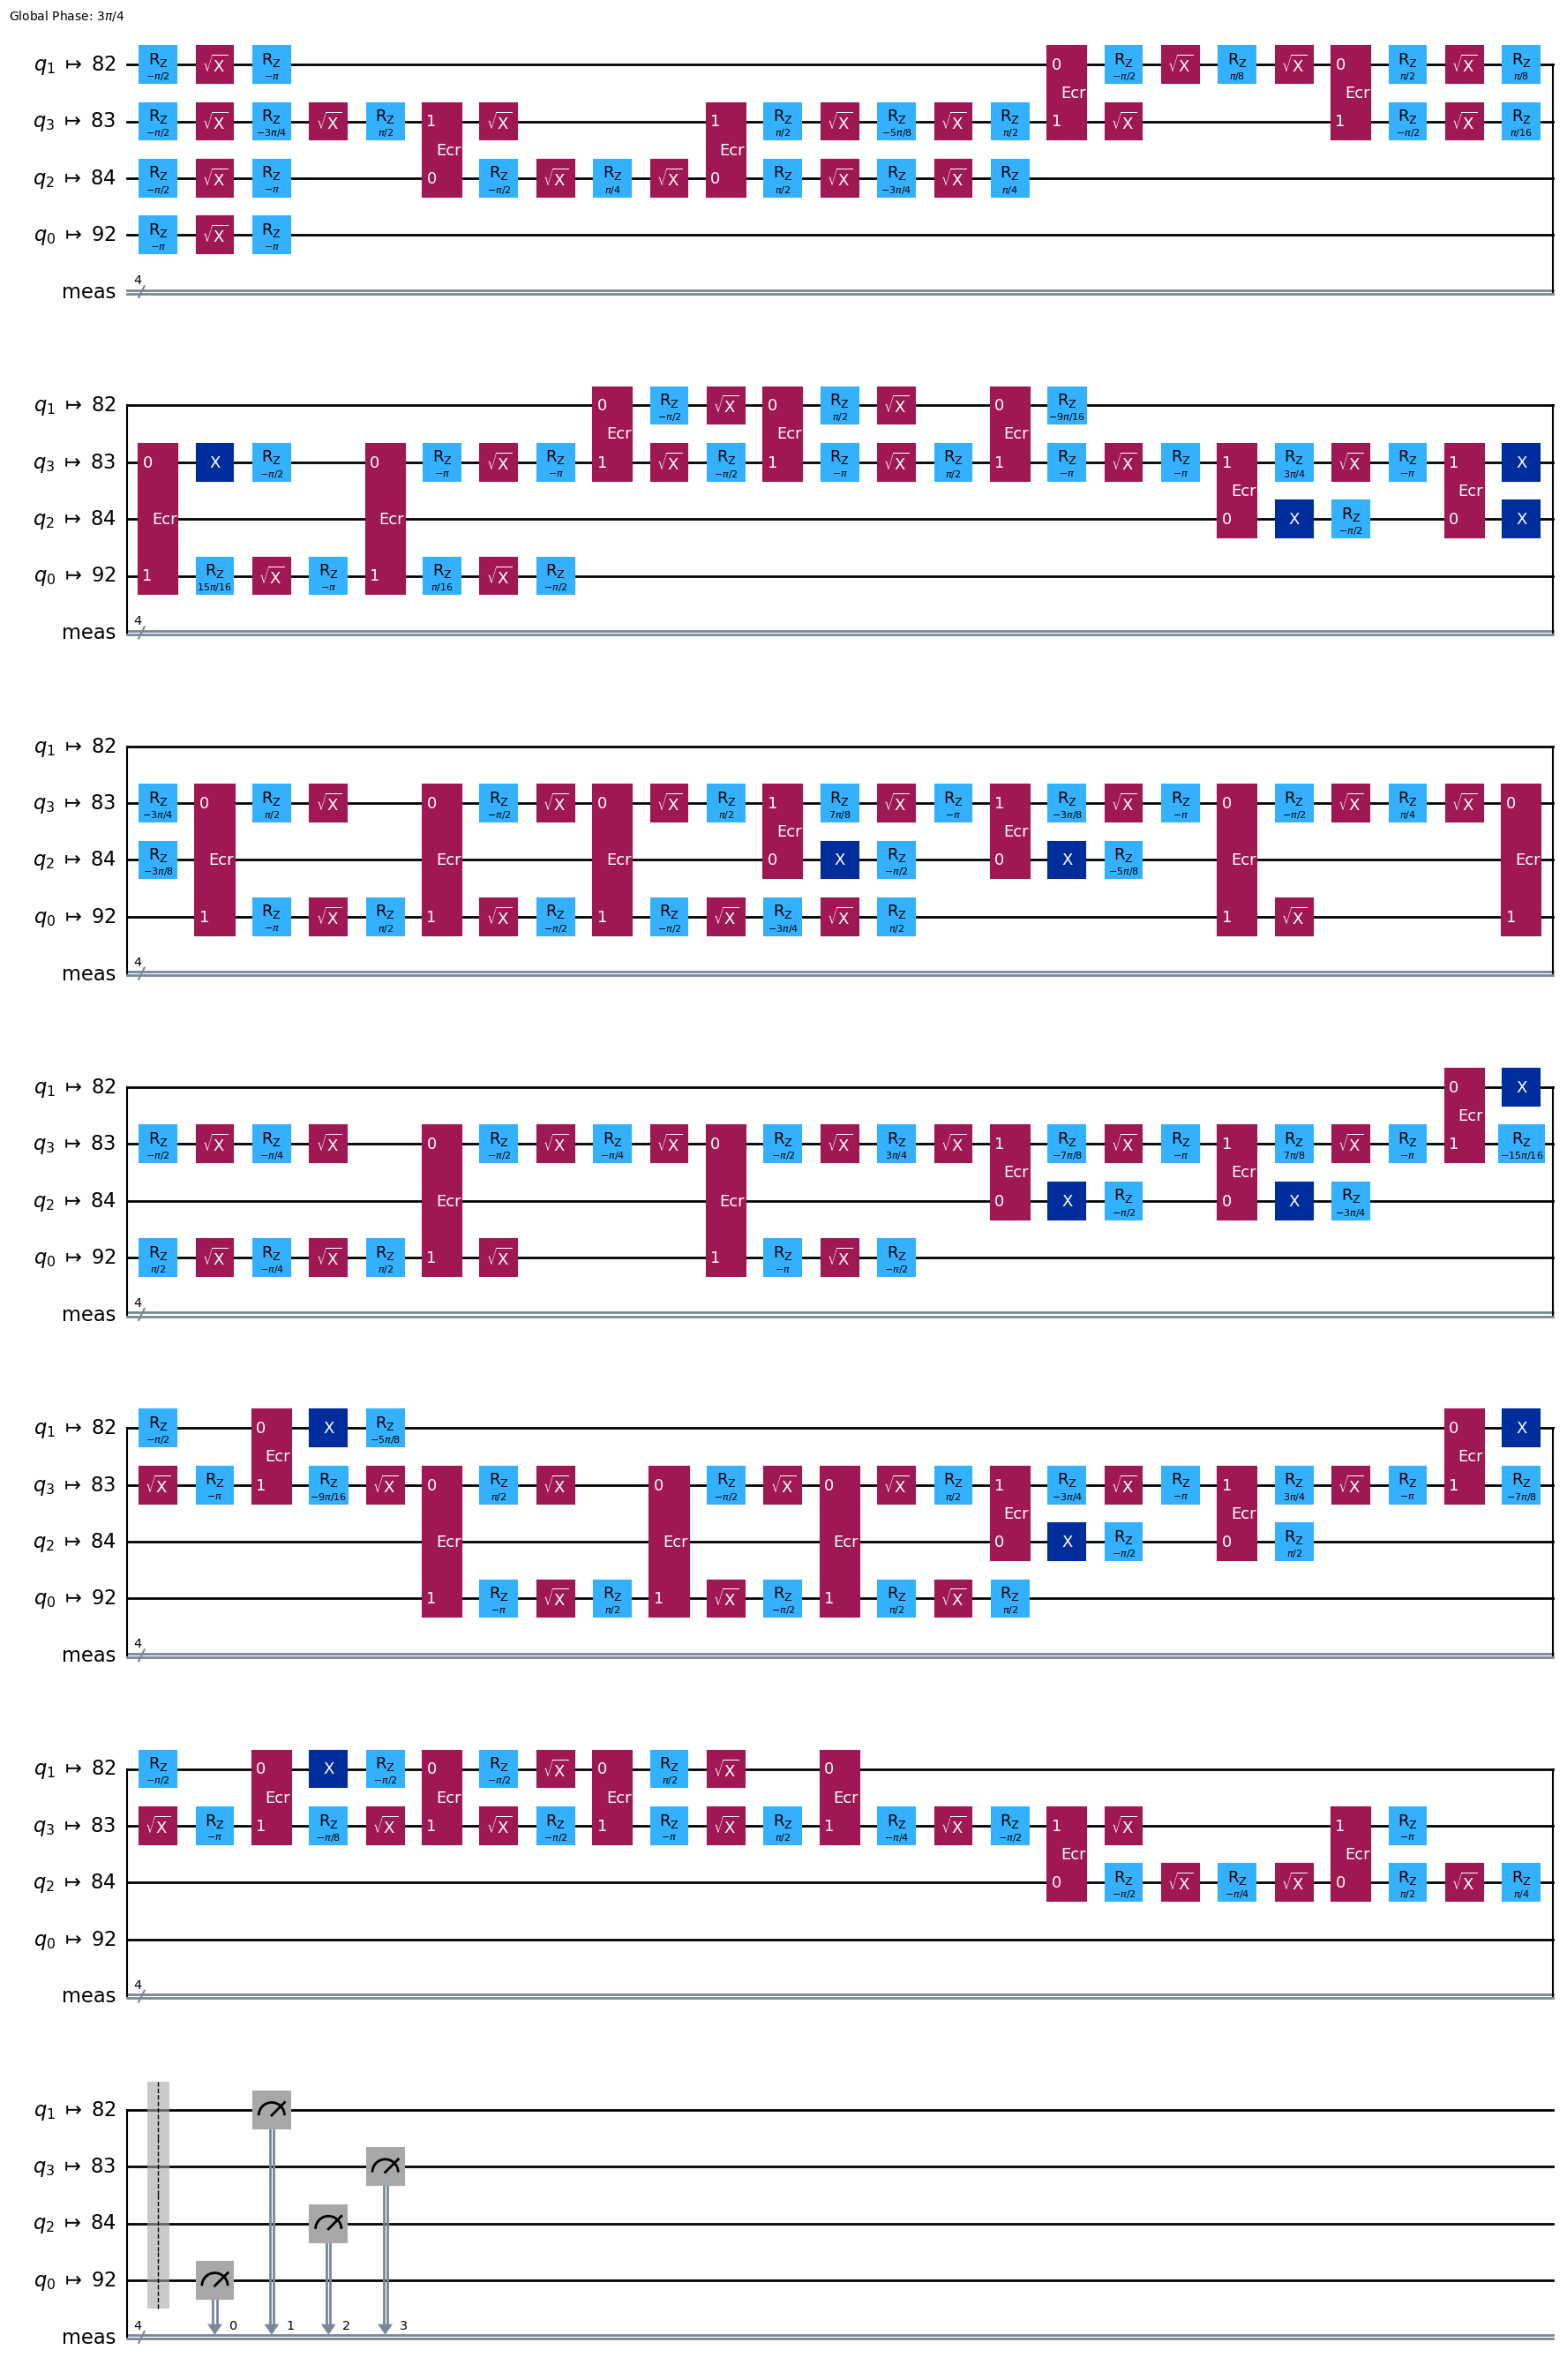

In [61]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc2)
 
isa_circuit.draw("mpl", idle_wires=False)

In [62]:
# Construct the Sampler instance.
 
sampler = Sampler(mode=backend)
sampler.options.default_shots = 5000


job = sampler.run([(isa_circuit)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cx19k7mztp30008es7k0


<BarContainer object of 16 artists>

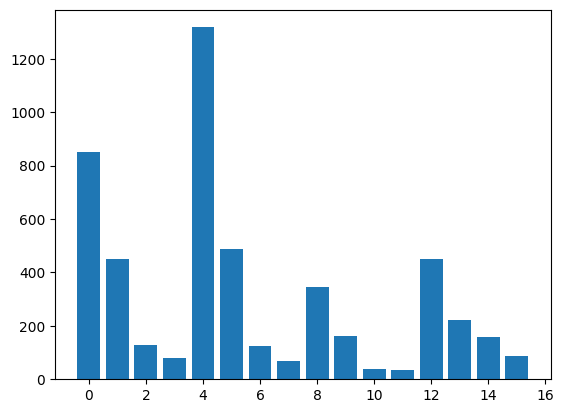

In [63]:
result = job.result()
# print(result[0].data.meas.get_counts())
# plot_histogram(result[0].data.meas.get_counts(), sort ='value_desc')
counts = result[0].data.meas.get_counts()
ints = [int(i, 2) for i in counts.keys()]
plt.bar(ints, counts.values())

# Analysis

In [66]:
service = QiskitRuntimeService()
jobList = ["cx19k7mztp30008es7k0", "cx19hjepjw300082tdwg", "cx199f5bqkhg0083m4g0", "cx17zjeztp30008es4fg"]
dicts = []
for jobId in jobList:
    result = service.job(jobId).result()[0].data.meas.get_counts()
    dicts.append(result)
lengths = []
frac = []
for counts in dicts:
    length = len(list(counts.keys())[0])
    lengths.append(length)
    bitString = length*'0'
    frac.append(counts[bitString]/5000)

Text(0.5, 1.0, 'Evaluation of IBM Quantum Computer on QFTQFT-1|x>')

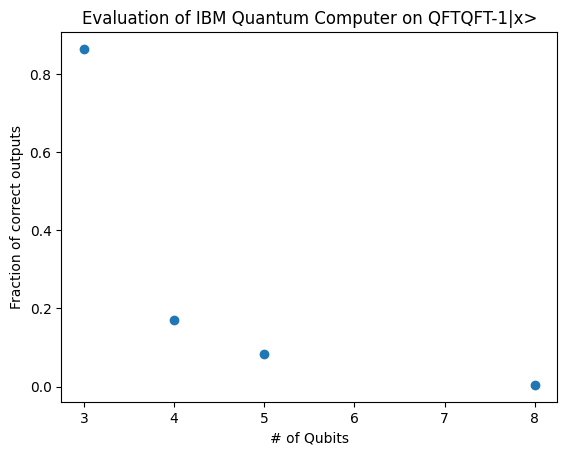

In [67]:
fig = plt.figure()
plt.scatter(lengths, frac)
plt.xlabel('# of Qubits')
plt.ylabel('Fraction of correct outputs')
plt.title('Evaluation of IBM Quantum Computer on QFTQFT-1|x>')